# Libraries

In [1]:
import sys
sys.path.append('..')  # Adds the project root to the path

%load_ext autoreload
%autoreload 2

from utils.visualization import *
import configparser

# Read the configuration file
config = configparser.ConfigParser()
config.read('/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/config.ini')


# Retrieve the path for min boggle
mindboggle_path = config['DIRECTORIES']['mindboggle']
dbb_path = config['DIRECTORIES']['dbb']
dbb_augmented_path = config['DIRECTORIES']['dbb_augmented']
feta_path = config['DIRECTORIES']['feta']


In [2]:
feta_path

'/rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta'

# 1. Visualize MindBoggle

In [ ]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(mindboggle_path)
ground_truth_data, input_data, segmentation_data = load_nifti_triplet(ground_truth_path, input_path, segmentation_path)

In [ ]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_mindboggle_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get the colormap objects
    gray_cmap = plt.get_cmap('gray')

    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap=gray_cmap)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(input_data[:, :, slice_idx], cmap=gray_cmap)
    axes[1].set_title('Input')
    axes[1].axis('off')

    # Create a custom colormap for segmentation
    custom_colors = ['black', 'gray', 'white', 'red', 'orange']
    custom_cmap = ListedColormap(custom_colors)
    
    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=custom_cmap, vmin=0, vmax=len(custom_colors) - 1)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend with the custom colors
    labels = ['Background', 'Cortical gray matter', 'Cortical white matter', 'Cerebellum gray', 'Cerebellum white']
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in custom_colors]
    fig.legend(lines, labels, loc='lower center', ncol=5)

    return fig

# Assuming the data arrays ground_truth_data, input_data, and segmentation_data are already loaded
# Create an interactive slider for Mindboggle dataset
slice_slider_mindboggle = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact_mindboggle = interactive(plot_mindboggle_slices, ground_truth_data=widgets.fixed(ground_truth_data), input_data=widgets.fixed(input_data), segmentation_data=widgets.fixed(segmentation_data), slice_idx=slice_slider_mindboggle)
display(interact_mindboggle)


# 2. Visualize DBB

In [ ]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(dbb_path)
ground_truth_data, input_data, segmentation_data = load_nifti_triplet(ground_truth_path, input_path, segmentation_path)

In [ ]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_dbb_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get the colormap objects
    gray_cmap = plt.get_cmap('gray')

    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap=gray_cmap)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(input_data[:, :, slice_idx], cmap=gray_cmap)
    axes[1].set_title('Input')
    axes[1].axis('off')

    # Create a custom colormap for segmentation
    custom_colors = ['black', 'blue', 'gray', 'white', 'purple', 'red', 'orange']
    custom_cmap = ListedColormap(custom_colors)
    
    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=custom_cmap, vmin=0, vmax=len(custom_colors) - 1)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend with the custom colors
    labels = ['Background', 'Cerebrospinal Fluid', 'Gray Matter', 'White Matter', 'Subcortical Gray Matter', 'Brain Stem', 'Cerebellum']
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in custom_colors]
    fig.legend(lines, labels, loc='lower center', ncol=7)

    return fig

# Assuming the data arrays ground_truth_data, input_data, and segmentation_data are already loaded
# Create an interactive slider for DBB dataset
slice_slider_dbb = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact_dbb = interactive(plot_dbb_slices, ground_truth_data=widgets.fixed(ground_truth_data), input_data=widgets.fixed(input_data), segmentation_data=widgets.fixed(segmentation_data), slice_idx=slice_slider_dbb)
display(interact_dbb)


# 4. Visualize Feta

In [4]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(feta_path)
ground_truth_data, input_data, segmentation_data = load_nifti_triplet(ground_truth_path, input_path, segmentation_path)

Getting a random file from directory
Random file: sub-075_rec-irtk_T2w.nii.gz
------------------------------
Input path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/input/sub-075_rec-irtk_T2w.nii.gz
------------------------------
Ground truth path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/ground_truth/sub-075_rec-irtk_T2w.nii.gz
Segmentation path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/segmentation/sub-075_rec-irtk_T2w.nii.gz




Loading nifti files..
Ground Truth Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/ground_truth/sub-075_rec-irtk_T2w.nii.gz):
Shape: (256, 256, 256)
------------------------------

------------------------------
Input Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/input/sub-075_rec-irtk_T2w.nii.gz):
Shape: (256, 256, 256)
------------------------------

------------------------------
Segmentation Dat

Data Information

Ground Truth Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 8

Input Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 2868618

Segmentation Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 8






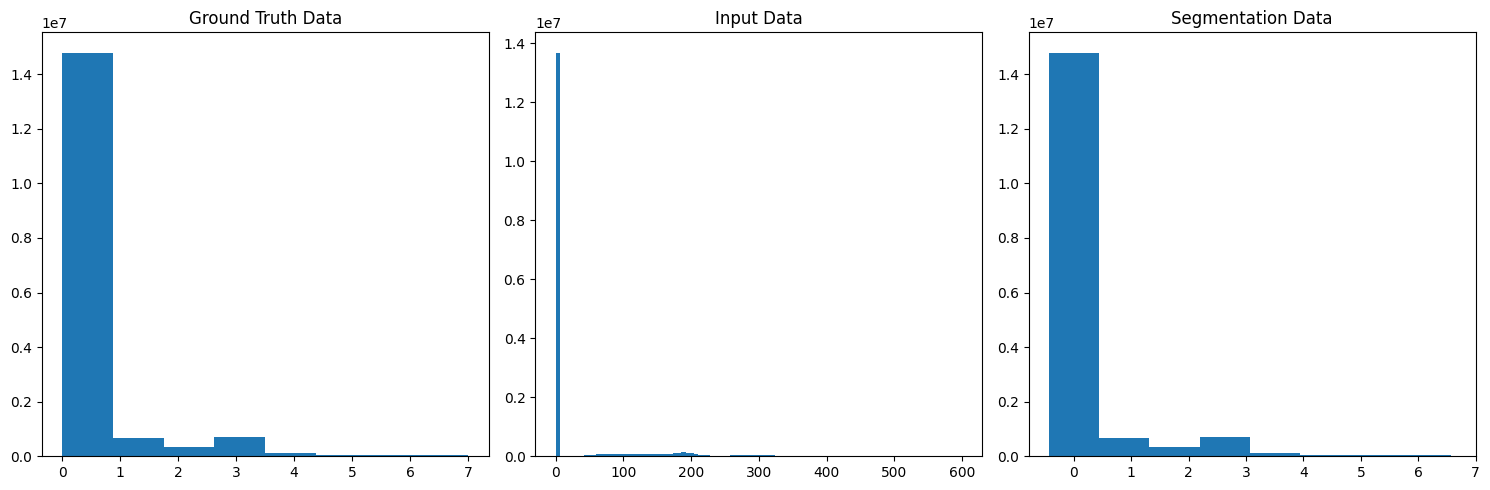

In [5]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [7]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def plot_feta_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Define custom colormap for segmentation
    colors = [
        'black',  # Background and Non-Brain Tissue (BG)
        'blue',   # External CSF (CSF)
        'gray',   # Grey Matter (GM)
        'white',  # White Matter (WM)
        'red',    # Ventricles (LV)
        'orange', # Cerebellum (CBM)
        'green',  # Deep Grey Matter (SGM)
        'yellow'  # Brainstem (BS)
    ]
    cmap = mcolors.ListedColormap(colors)

    # Plot Ground Truth
    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap='gray')
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    # Plot Input Data
    axes[1].imshow(input_data[:, :, slice_idx], cmap='gray')
    axes[1].set_title('Input')
    axes[1].axis('off')

    # Plot Segmentation Data
    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=cmap)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend for 8 classes (0 = background)
    labels = [
        'Background and Non-Brain Tissue (BG)',
        'External CSF (CSF)',
        'Grey Matter (GM)',
        'White Matter (WM)',
        'Ventricles (LV)',
        'Cerebellum (CBM)',
        'Deep Grey Matter (SGM)',
        'Brainstem (BS)'
    ]
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in colors]
    fig.legend(lines, labels, loc='lower center', ncol=4)

    return fig

# Create an interactive slider for FeTA dataset
slice_slider_feta = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact_feta = interactive(plot_feta_slices, ground_truth_data=widgets.fixed(ground_truth_data), 
                            input_data=widgets.fixed(input_data), 
                            segmentation_data=widgets.fixed(segmentation_data), 
                            slice_idx=slice_slider_feta)
display(interact_feta)


interactive(children=(IntSlider(value=0, description='slice_idx', max=255), Output()), _dom_classes=('widget-i…